In [434]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pandas import DatetimeIndex

sns.set_style("whitegrid")

In [435]:
my_columns = ["Sales_Contract_No","Account_Owner","Opportunity_Owner","Account_Type","Opportunity_Type","Quote_Type",
            "Delivery_Terms","Opportunity_Created_Date","Brand","Product_Type","Size","Product_Category_B","Price",
            "Stage","Opportunity_ID","Last_Modified_Date","Region","Territory", "Pricing, Delivery_Terms_Quote_Appr",
              "Pricing, Delivery_Terms_Approved"]#contexto
df_completo = pd.read_csv('Entrenamieto_ECI_2020.csv')
df = df_completo[my_columns]
df_completo.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [436]:
## Seteo de DateTime
#COLUMNA DATE A DATETIME

df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], format='%m/%d/%Y')
df["Opportunity_Created_Day"] = DatetimeIndex(df["Opportunity_Created_Date"]).day
df["Opportunity_Created_Month"] = DatetimeIndex(df["Opportunity_Created_Date"]).month
df["Opportunity_Created_Year"] = DatetimeIndex(df["Opportunity_Created_Date"]).year
df["Opportunity_Created_Week_Day"] = DatetimeIndex(df["Opportunity_Created_Date"]).dayofweek

df["Last_Modified_Date"] = pd.to_datetime(df["Last_Modified_Date"], format='%m/%d/%Y')
df["Last_Modified_Day"] = DatetimeIndex(df["Last_Modified_Date"]).day
df["Last_Modified_Month"] = DatetimeIndex(df["Last_Modified_Date"]).month
df["Last_Modified_Year"] = DatetimeIndex(df["Last_Modified_Date"]).year
df["Last_Modified_Week_Day"] = DatetimeIndex(df["Last_Modified_Date"]).dayofweek


df_won = df[df.Stage=="Closed Won"]
df_lost = df[df.Stage=="Closed Lost"]

df_won.head()

<ipython-input-436-6670b81a7c3e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-436-6670b81a7c3e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-436-6670b81a7c3e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-436-667

,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,...,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Opportunity_Created_Day,Opportunity_Created_Month,Opportunity_Created_Year,Opportunity_Created_Week_Day,Last_Modified_Day,Last_Modified_Month,Last_Modified_Year,Last_Modified_Week_Day
1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,...,0,0,7,12,2015,0,15,1,2016,4
2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,...,0,0,8,12,2015,1,29,9,2016,3
7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-09,None,None,...,1,1,9,12,2015,2,9,12,2015,2
23,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-09,None,None,...,1,1,9,12,2015,2,7,1,2016,3
63,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,2015-12-09,None,None,...,0,0,9,12,2015,2,9,12,2015,2


In [437]:
#Limpio territorios
df.loc[((df.Region == "EMEA")&(df.Territory.str.contains("America"))), "Region"] = "Americas"
df = df.replace({"Territory":{"KSA":"Saudi Arabia"}})
df["Region"] = df["Region"].replace({"Middle East":"EMEA"})
df["Territory"] = df["Territory"].replace({"None":"Other"})
#Limpio territorios

c:\users\fedeb\desktop\datos\workspace\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fecha usada: Opportunity_Created_Date
Oportunidades Gral promedio por Account_Owner = 203.97916666666666
Oportunidades Won promedio por Account_Owner = 130.05128205128204
Oportunidades Lost promedio por Account_Owner = 98.3125
Fecha usada: Last_Modified_Date
Oportunidades Gral promedio por Account_Owner = 203.97916666666666
Oportunidades Won promedio por Account_Owner = 130.05128205128204
Oportunidades Lost promedio por Account_Owner = 98.3125


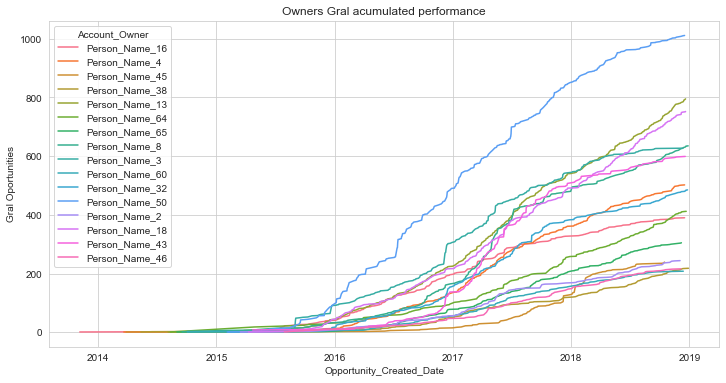

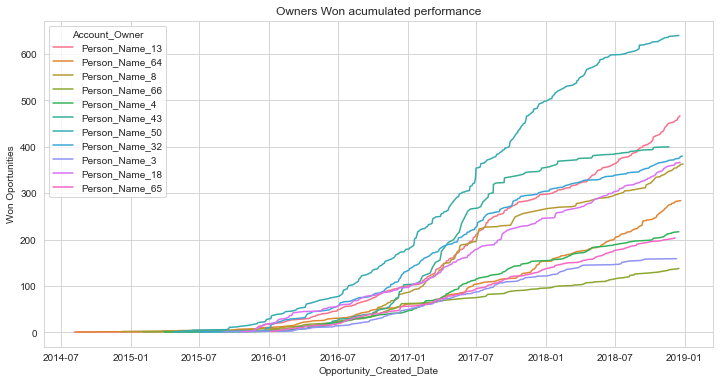

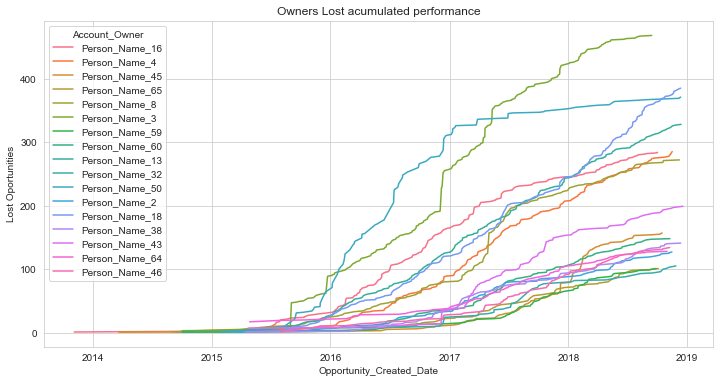

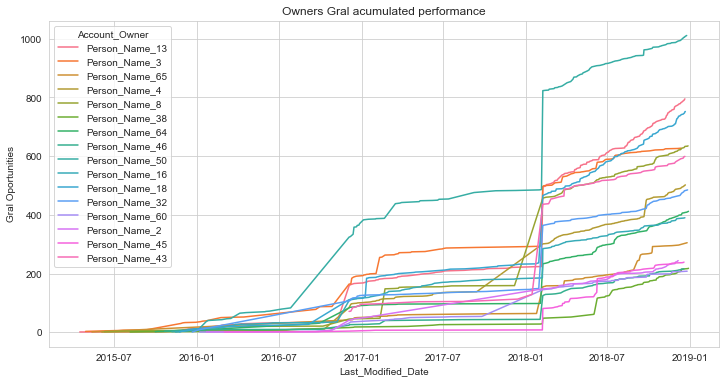

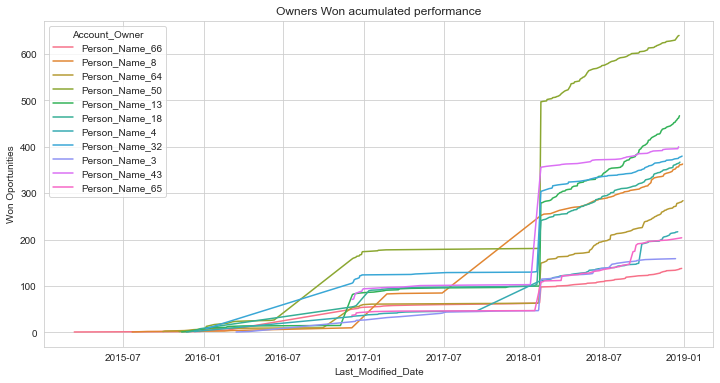

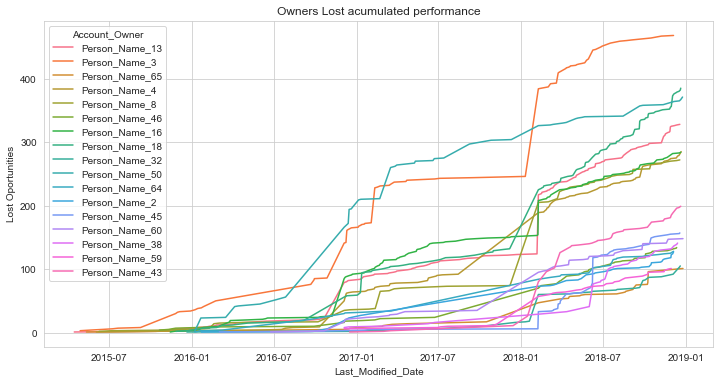

In [438]:
##EVOLUCION ACUMULADA DE OPORTUNIDADES SEGUN DUEÑOS
#(para aquellos que superen el promedio)

dfs = [df, df_won, df_lost]
dfs_desc = ["Gral","Won","Lost"]
date_columns = ["Opportunity_Created_Date", "Last_Modified_Date"]

for date_column in date_columns:
    print("Fecha usada: "+date_column)
    for i in range(0,3): #lo hago en general, ganados y perdidos
        dataframe = dfs[i]
        dataframe = dataframe[(dataframe["Stage"]=="Closed Won") | (dataframe["Stage"]=="Closed Lost")].drop_duplicates(subset=['Opportunity_ID'], keep='last')
        series_owners = dataframe.groupby(["Account_Owner"])["Opportunity_ID"].agg("count")
        prom_per_owner = series_owners.agg("mean")
        dataframe_owners = series_owners.to_frame().reset_index() #NO PUDE HACERLO CON MERGE
        dataframe_owners.columns = ["Account_Owner", "Opportunity_Qtty"]
        print("Oportunidades "+dfs_desc[i]+" promedio por Account_Owner = "+str(prom_per_owner))

        dataframe = pd.merge(dataframe, dataframe_owners, on="Account_Owner",how="inner")
        dataframe["Opportunity_Qtty_Prom"] = prom_per_owner

        dataframe_per_account_owners = dataframe[dataframe["Opportunity_Qtty"]>dataframe["Opportunity_Qtty_Prom"]]
        graph_df = dataframe_per_account_owners.groupby([date_column, "Account_Owner"]).agg({"Opportunity_ID":"count"})
        graph_df.columns = ["Opportunity_Qtty"]
        graph_df = graph_df.groupby(["Account_Owner"]).agg({"Opportunity_Qtty":np.cumsum}).reset_index()

        fig, ax = plt.subplots(figsize = (12,6))
        fig = sns.lineplot(data=graph_df, x=date_column, y='Opportunity_Qtty', hue='Account_Owner', ax=ax)
        fig.set_ylabel(dfs_desc[i]+" Oportunities")
        fig.set_xlabel(date_column)
        fig.set_title("Owners "+dfs_desc[i]+" acumulated performance")


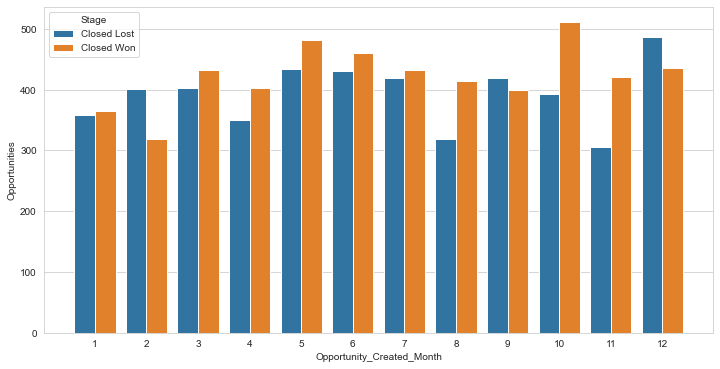

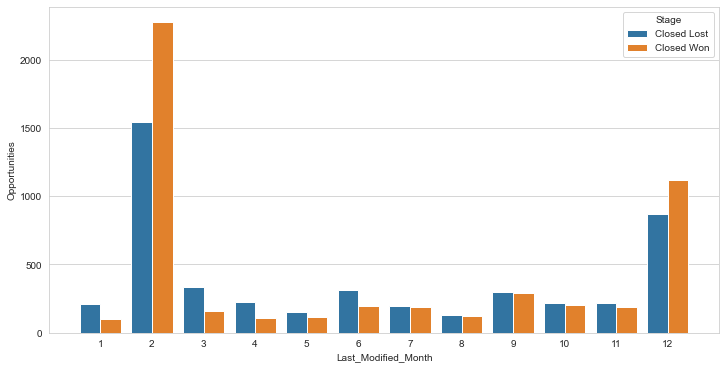

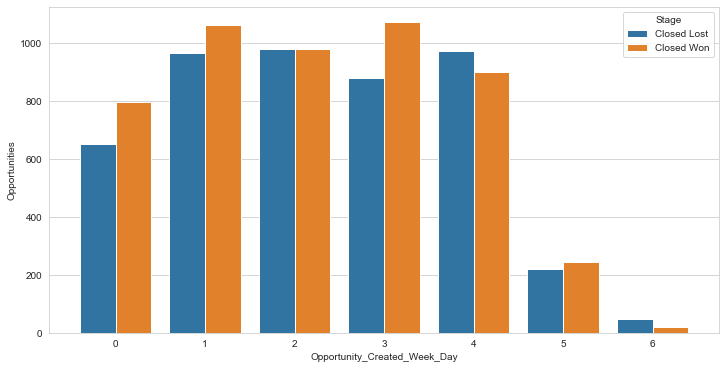

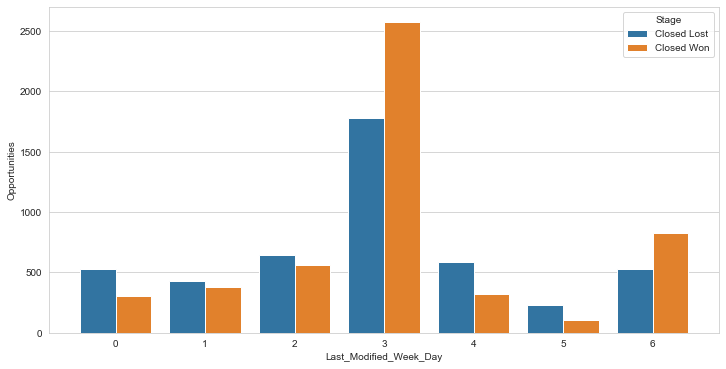

In [439]:
##OPORTUNIDADES CREADAS POR MES (según target)
dt_columns = ["Opportunity_Created_Month", "Last_Modified_Month","Opportunity_Created_Week_Day","Last_Modified_Week_Day"]
for dt in dt_columns:
    data = df[(df["Stage"]=="Closed Won") | (df["Stage"]=="Closed Lost")].drop_duplicates(subset=['Opportunity_ID'], keep='last').groupby([dt,"Stage"]).agg({"Opportunity_ID":"count"}).reset_index()
    fig, ax = plt.subplots(figsize = (12,6))
    fig = sns.barplot(data=data, x=dt, y="Opportunity_ID", hue="Stage", ax=ax)
    fig.set_ylabel("Opportunities")
    fig.set_xlabel(dt)
    fig.plot()


In [440]:
#correccion de aprobados
print(df[(df["Pricing, Delivery_Terms_Approved"]==0) & (df["Pricing, Delivery_Terms_Quote_Appr"]==0)]["Pricing, Delivery_Terms_Approved"].value_counts())
df.loc[((df["Pricing, Delivery_Terms_Approved"] == 0)&(df["Pricing, Delivery_Terms_Quote_Appr"]==0)), "Pricing, Delivery_Terms_Approved"] = 1
print(df[(df["Pricing, Delivery_Terms_Approved"]==1) & (df["Pricing, Delivery_Terms_Quote_Appr"]==0)]["Pricing, Delivery_Terms_Approved"].value_counts())


print(len(df))
needs_approval = df[df["Pricing, Delivery_Terms_Quote_Appr"]==1]
not_needs_approval = df[df["Pricing, Delivery_Terms_Quote_Appr"]==0]
stages = ["Closed Won", "Closed Lost"]
print("---Necesitan aprobarse")
print(len(needs_approval))
print("---NO necesitan aprobarse")
print(len(not_needs_approval))



print("---Aprobados")
print(len(df[(df["Pricing, Delivery_Terms_Approved"]==1) & (df["Pricing, Delivery_Terms_Quote_Appr"]==1)]))
print(len(df[(df["Pricing, Delivery_Terms_Approved"]==1) & (df["Pricing, Delivery_Terms_Quote_Appr"]==0)]))
print(df[(df["Pricing, Delivery_Terms_Approved"]==1) & (df["Stage"].isin(stages))].groupby(["Delivery_Terms"])["Opportunity_ID"].agg("count"))
print("---DESaprobados")
print(len(df[(df["Pricing, Delivery_Terms_Approved"]==0) & (df["Pricing, Delivery_Terms_Quote_Appr"]==1)]))
print(len(df[(df["Pricing, Delivery_Terms_Approved"]==0) & (df["Pricing, Delivery_Terms_Quote_Appr"]==0)]))
print(df[(df["Pricing, Delivery_Terms_Approved"]==0) & (df["Stage"].isin(stages))].groupby(["Delivery_Terms"])["Opportunity_ID"].agg("count"))


0    3254
Name: Pricing, Delivery_Terms_Approved, dtype: int64
1    3254
Name: Pricing, Delivery_Terms_Approved, dtype: int64
16947
---Necesitan aprobarse
13693
---NO necesitan aprobarse
3254
---Aprobados
9890
3254
Delivery_Terms
Delivery_Terms_0       3
Delivery_Terms_1    2325
Delivery_Terms_2    3754
Delivery_Terms_3      25
Delivery_Terms_4    5629
Delivery_Terms_5     538
Delivery_Terms_6     700
Delivery_Terms_7      25
Delivery_Terms_8     102
Name: Opportunity_ID, dtype: int64
---DESaprobados
3803
0
Delivery_Terms
Delivery_Terms_0       3
Delivery_Terms_1     585
Delivery_Terms_2     876
Delivery_Terms_3      16
Delivery_Terms_4    2053
Delivery_Terms_5      95
Delivery_Terms_6      79
Delivery_Terms_7      13
Delivery_Terms_8      62
Name: Opportunity_ID, dtype: int64


In [466]:
print("---Agrupo por delivery term")
print(df.groupby(["Stage","Delivery_Terms"])["Opportunity_ID"].agg("count"))


---Agrupo por delivery term
Stage          Delivery_Terms  
Closed Lost    Delivery_Terms_0       2
               Delivery_Terms_1    1585
               Delivery_Terms_2    2075
               Delivery_Terms_3      21
               Delivery_Terms_4    3186
               Delivery_Terms_5     214
               Delivery_Terms_6     166
               Delivery_Terms_7      17
               Delivery_Terms_8      84
Closed Won     Delivery_Terms_0       4
               Delivery_Terms_1    1325
               Delivery_Terms_2    2555
               Delivery_Terms_3      20
               Delivery_Terms_4    4496
               Delivery_Terms_5     419
               Delivery_Terms_6     613
               Delivery_Terms_7      21
               Delivery_Terms_8      80
Negotiation    Delivery_Terms_1       9
               Delivery_Terms_2       1
               Delivery_Terms_4       8
Proposal       Delivery_Terms_1      14
               Delivery_Terms_2       2
               Deliv

Pasando en "limpio"

total 16883
Closed Won       9533
Closed Lost      7350

Necesitan aprobarse 13629:
    - Won       7415
    - Lost      6214
    * deesaprobados 3792
        -- Lost      2771
        -- Won       1011
    * aprobados 9847
        -- Won     6404
        -- Lost    3443

NO necsitan aprobarse 3254 (todos figuran desaprobados)
    aprobados = todos
   - Won     2118
   - Lost    1136

In [474]:
TOT = 0
AN = 1
NAN = 2
A = 3
D = 4
DT0 = 5
DT1 = 6
DT2 = 7
DT3 = 8
DT4 = 9
DT5 = 10
DT6 = 11
DT7 = 12
DT8 = 13
WON = 14
LOST = 15


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 18,
      line = dict(color = "black", width = 0.5),
      label = ["Total Opportunities (16947)","Approval needed(13693)", "Approval NOT needed(3254)",  "Approved(13144)", "Disapproved(3803)",
               "Delivery_Terms_0(6)", "Delivery_Terms_1(2910)", "Delivery_Terms_2(4630)", "Delivery_Terms_3(41)", "Delivery_Terms_4(7682)", "Delivery_Terms_5(633)", "Delivery_Terms_6(779)", "Delivery_Terms_7(38)", "Delivery_Terms_8(164)","Closed Won", "Closed Lost"],
      color = ["BLUE", "orange", "#1c9454", "GREEN","RED","green", "gray","gray","gray","gray","gray","gray","gray","gray","green","red"],
    ),
    link = dict(
      source = [TOT, TOT,   AN,   AN,     NAN,      A,A,A,A,A,A,A,A,A,                        D,D,D,D,D,D,D,D,D,                         DT0,DT0,  DT1,DT1,     DT2,DT2,   DT3,DT3,   DT4,DT4,  DT5,DT5,    DT6,DT6, DT7,DT7,DT8,DT8], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [NAN, AN,    A,    D,      A,        DT0,DT1,DT2,DT3,DT4,DT5,DT6,DT7,DT8,      DT0,DT1,DT2,DT3,DT4,DT5,DT6,DT7,DT8,       WON,LOST, WON,LOST,    WON,LOST,  WON,LOST,  WON,LOST, WON,LOST,   WON,LOST,WON,LOST,WON,LOST],
      value = [3254, 13693, 9890, 3803,   3254,     3,2325,3754,25,5629,538,700,25,102,       3,585,876,16,2053,95,79,13,62,             4,2,     1325,1585,    2555,2075, 20,21,     4496,3186, 419,214,     613,166, 21,17,  80,84  ],
      color = ["lightblue", "lightblue", "#ded252", "darksalmon",
               "lightgreen","lightgreen","lightgreen","lightgreen","lightgreen","lightgreen","lightgreen","lightgreen","lightgreen","lightgreen",
               "darksalmon","darksalmon","darksalmon","darksalmon","darksalmon","darksalmon","darksalmon","darksalmon","darksalmon",
                "lightgreen","darksalmon", "lightgreen","darksalmon", "lightgreen","darksalmon", "lightgreen","darksalmon", "lightgreen","darksalmon", "lightgreen","darksalmon", "lightgreen","darksalmon", "lightgreen","darksalmon","lightgreen","darksalmon",],

  ))])

fig.update_layout(title_text="Delivery Flux", font_size=7)
fig.show()